In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (11,5.5)

In [2]:
baslikfont = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size':13}
eksenfont = {'family': 'sans', 'color':'darkblue', 'weight': 'bold', 'size':11}

In [3]:
ogrenciler1 = pd.read_csv("StudentsPerformance.csv")
ogrenciler1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
ogrenciler1.columns = ['cinsiyet', 'koken', 'aile_egt', 'ogle_yemegi', 'hz_kursu', 'mat_notu', 'okuma_notu', 'yazma_notu']
ogrenciler1.head()

,cinsiyet,koken,aile_egt,ogle_yemegi,hz_kursu,mat_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
ogrenciler2=ogrenciler1.groupby(['cinsiyet']).mean()
ogrenciler2

,mat_notu,okuma_notu,yazma_notu
cinsiyet,,,
female,63.633,72.608,72.467
male,68.728,65.473,63.311


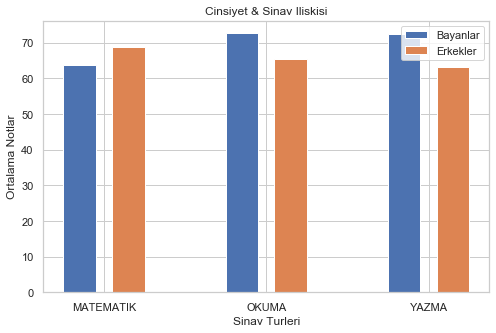

In [6]:
plt.figure(figsize=(8,5))

plt.bar(np.arange(3)-0.15, list(ogrenciler2.iloc[0]), width=0.2)
plt.bar(np.arange(3)+0.15, list(ogrenciler2.iloc[1]),  width=0.2) 
plt.title('Cinsiyet & Sinav Iliskisi') 
plt.xticks(np.arange(3), ['MATEMATIK', 'OKUMA','YAZMA'])

plt.xlabel('Sinav Turleri')
plt.ylabel('Ortalama Notlar')

plt.legend(['Bayanlar','Erkekler'])
plt.show()

In [7]:
ogrenciler3=ogrenciler1.groupby(['koken']).mean()
ogrenciler3

,mat_notu,okuma_notu,yazma_notu
koken,,,
group A,61.629,64.674,62.674
group B,63.453,67.353,65.600
group C,64.464,69.103,67.828
group D,67.363,70.031,70.145
group E,73.821,73.029,71.407


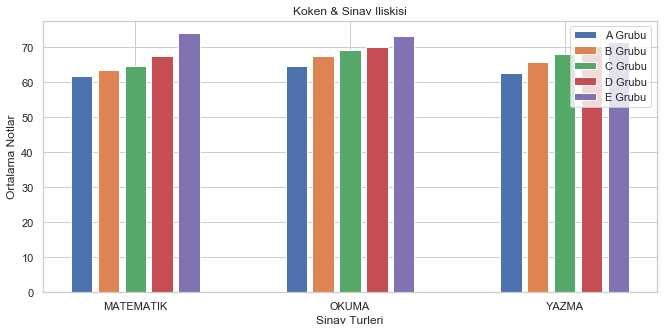

In [8]:
plt.figure(figsize=(11,5))
for i in range(5):
    plt.bar(np.arange(3)+i/8+0.1, list(ogrenciler3.iloc[i]),  width=0.1) 

plt.title('Koken & Sinav Iliskisi')  
plt.xticks(np.arange(3)+0.35, ['MATEMATIK', 'OKUMA','YAZMA'])

plt.xlabel('Sinav Turleri')
plt.ylabel('Ortalama Notlar')

plt.legend(['A Grubu','B Grubu', 'C Grubu', 'D Grubu', 'E Grubu'])
plt.show()

In [9]:
ogrenciler4=ogrenciler1.groupby(['aile_egt']).mean()
ogrenciler4

,mat_notu,okuma_notu,yazma_notu
aile_egt,,,
associate's degree,67.883,70.928,69.896
bachelor's degree,69.390,73.000,73.381
high school,62.138,64.704,62.449
master's degree,69.746,75.373,75.678
some college,67.128,69.460,68.841
some high school,63.497,66.939,64.888


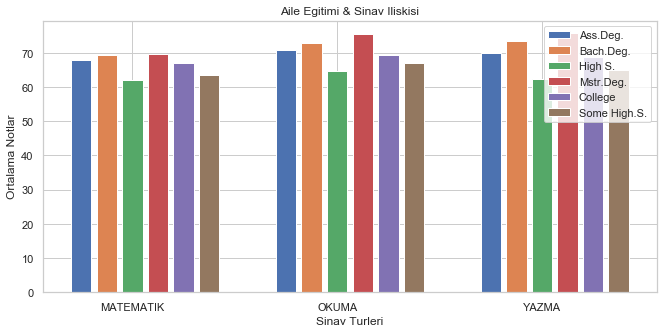

In [10]:
plt.figure(figsize=(11,5))
for i in range(6):
    plt.bar(np.arange(3)+i/8+0.1, list(ogrenciler4.iloc[i]),  width=0.1) 

plt.title('Aile Egitimi & Sinav Iliskisi')  
plt.xticks(np.arange(3)+0.35, ['MATEMATIK', 'OKUMA','YAZMA'])

plt.xlabel('Sinav Turleri')
plt.ylabel('Ortalama Notlar')

plt.legend(['Ass.Deg.','Bach.Deg.', 'High S.', 'Mstr.Deg.', 'College','Some High.S.'])
plt.show()

In [12]:
ogrenciler5=ogrenciler1.groupby(['ogle_yemegi']).mean()
ogrenciler5

,mat_notu,okuma_notu,yazma_notu
ogle_yemegi,,,
free/reduced,58.921,64.654,63.023
standard,70.034,71.654,70.823


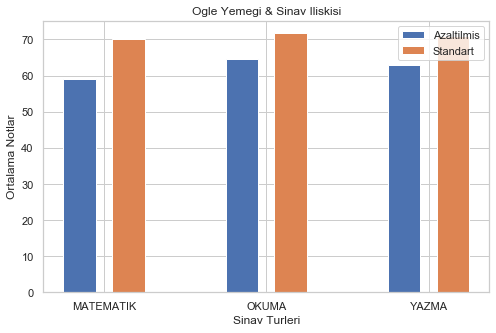

In [13]:
plt.figure(figsize=(8,5))

plt.bar(np.arange(3)-0.15, list(ogrenciler5.iloc[0]), width=0.2)
plt.bar(np.arange(3)+0.15, list(ogrenciler5.iloc[1]),  width=0.2) 
plt.title('Ogle Yemegi & Sinav Iliskisi') 
plt.xticks(np.arange(3), ['MATEMATIK', 'OKUMA','YAZMA'])

plt.xlabel('Sinav Turleri')
plt.ylabel('Ortalama Notlar')

plt.legend(['Azaltilmis','Standart'])
plt.show()

In [14]:
ogrenciler6=ogrenciler1.groupby(['hz_kursu']).mean()
ogrenciler6

,mat_notu,okuma_notu,yazma_notu
hz_kursu,,,
completed,69.696,73.894,74.419
none,64.078,66.534,64.505


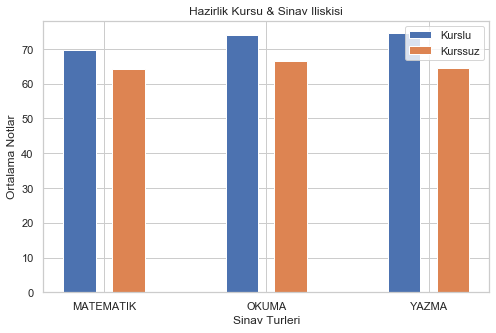

In [15]:
plt.figure(figsize=(8,5))

plt.bar(np.arange(3)-0.15, list(ogrenciler6.iloc[0]), width=0.2)
plt.bar(np.arange(3)+0.15, list(ogrenciler6.iloc[1]),  width=0.2) 
plt.title('Hazirlik Kursu & Sinav Iliskisi') 
plt.xticks(np.arange(3), ['MATEMATIK', 'OKUMA','YAZMA'])

plt.xlabel('Sinav Turleri')
plt.ylabel('Ortalama Notlar')

plt.legend(['Kurslu','Kurssuz'])
plt.show()

66.089
66.089


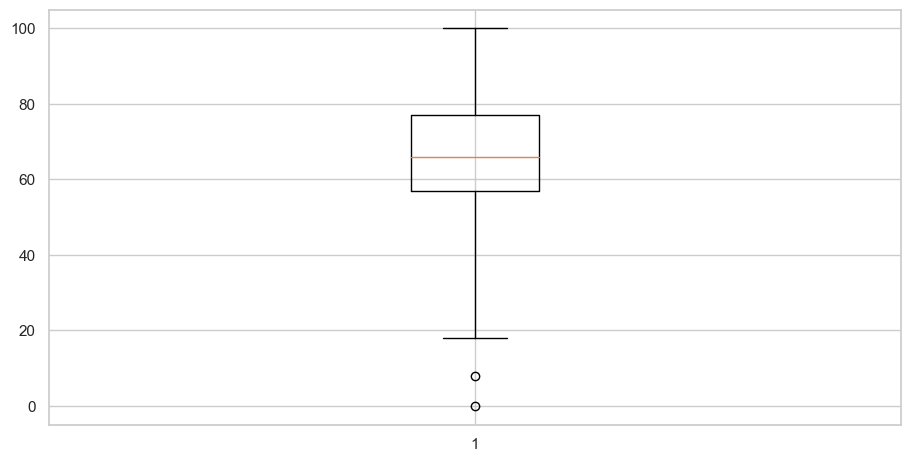

In [23]:
print(ogrenciler1['mat_notu'].mean())
print(winsorize(ogrenciler1['mat_notu']).mean()) #there are a couple of outliers but these do not affect the mean value.
plt.boxplot(ogrenciler1['mat_notu'], whis=2)
plt.show()

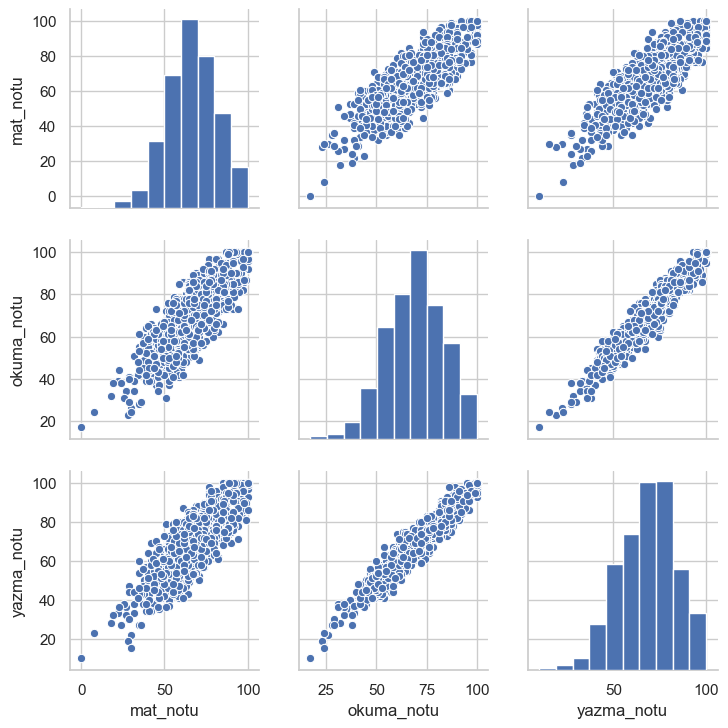

In [24]:
sns.pairplot(ogrenciler1, palette='deep')